<h1>Capstone 1</h1>
<h2>White Wine Quality, UC Irvine</h2> 
<h3>Random Forest Classifier and Support Vector Classifier</h3>
<h3>Two Categories</h3>

(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)<br>

<h4>Audrey Rager</h4>
<h4>November 18, 2020</h4>


## Importing Packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Loading Dataset

In [22]:
df = pd.read_csv('winequality-white.csv',sep=";")
print("Dataset Shape: ", df.shape)

#CHECKING DATA DISTRIBUTION
df.head()

Dataset Shape:  (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Preprocessing dataset

In [23]:
df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64>

In [24]:
# Classifying the wine quality as good or bad based on quality
# "Bad" or 0 if quality lies in the range (3, 6) (inclusivity)
# "Good" or 1 if quality lies in the range (7, 8) (inclusivity)

df['quality'] = df['quality'].apply(lambda x: 1 if x >6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


0    3838
1    1060
Name: quality, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

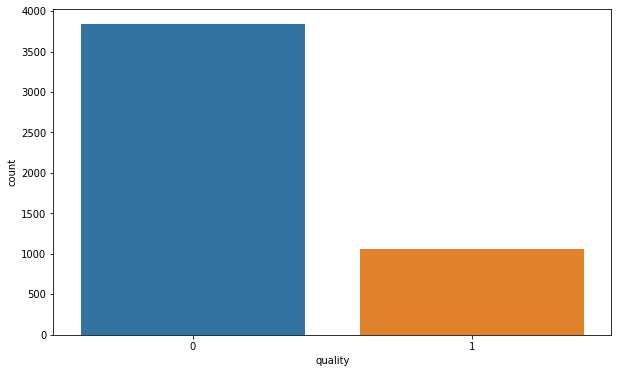

In [25]:
print(df['quality'].value_counts())

fig = plt.figure(figsize = (10,6))
sns.countplot(df['quality'])

In [26]:
# Separating the dependent and independent variables

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [27]:
# Splitting into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("X-train shape: ", X_train.shape)
print("X-test shape: ", X_test.shape)
print("y-train shape: ", y_train.shape)
print("y-test shape: ", y_test.shape)


X-train shape:  (3428, 11)
X-test shape:  (1470, 11)
y-train shape:  (3428,)
y-test shape:  (1470,)


In [28]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



## Creating ML Model

### (1) RANDOM FOREST CLASSIFIER

In [29]:
# Creating Random Forest Classifier Instance

rf_regressor = RandomForestClassifier(n_estimators = 100)

# fitting the classifier with training data
rf_regressor.fit(X_train,y_train)

# Predicting using Classifier
y_pred = rf_regressor.predict(X_test)



[[1105   36]
 [ 142  187]]


<Figure size 720x432 with 0 Axes>

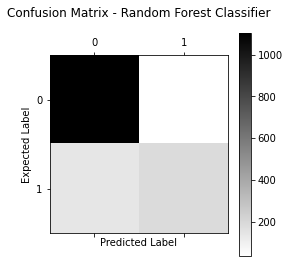

In [30]:
# Confusion matrix using the Random Forest Classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Matplot for confusion matrix of Random Forest Classifier
fig = plt.figure(figsize = (10,6))
plt.matshow(cm,cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix - Random Forest Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()



In [31]:
print("Total Predictions : ",len(y_pred))
print("Correct Prediction : ", sum(y_pred == y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred == y_test)*100 / len(y_pred), "%")



Total Predictions :  1470
Correct Prediction :  1292
Incorrect Prediction :  178
Accuracy :  87.89115646258503 %


### SUPPORT VECTOR CLASSIFIER (SVC)

In [32]:
# Support Vector Classifier Instance
svc_regressor = SVC()
# fitting train data to Support Vector Classifier
svc_regressor.fit(X_train, y_train)

# Predicitng using Support Vector Classifier
y_pred = svc_regressor.predict(X_test)


[[1099   42]
 [ 220  109]]


<Figure size 720x432 with 0 Axes>

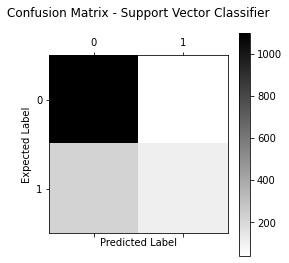

In [33]:
# Confusion Matrix using the Support Vector Classifier
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Matplot for Confusion Matrix of Support Vector Classifier
fig = plt.figure(figsize = (10,6))
plt.matshow(cm, cmap = plt.cm.binary, interpolation = 'nearest')
plt.title("Confusion Matrix - Support Vector Classifier\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()



In [34]:
print("Total Predictions : ",len(y_pred))
print("Correct Prediction : ", sum(y_pred == y_test))
print("Incorrect Prediction : ", sum(y_pred != y_test))
print("Accuracy : ", sum(y_pred == y_test)*100 / len(y_pred), "%")


Total Predictions :  1470
Correct Prediction :  1208
Incorrect Prediction :  262
Accuracy :  82.17687074829932 %


### TUNING ML ALGORITHM
#### (1) SVC

In [35]:
# Finding parameters for SVC models

param = {
    'C':[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
    'kernel':['linear','rbf'],
    'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}

grid_svc = GridSearchCV(svc_regressor, param_grid = param, scoring = 'accuracy', cv = 10)



In [36]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [37]:
print("Best Parameters for SVC: ",grid_svc.best_params_)

Best Parameters for SVC:  {'C': 1.4, 'gamma': 1.3, 'kernel': 'rbf'}


Confusion Matrix: 
 [[1102   39]
 [ 152  177]]


<Figure size 720x432 with 0 Axes>

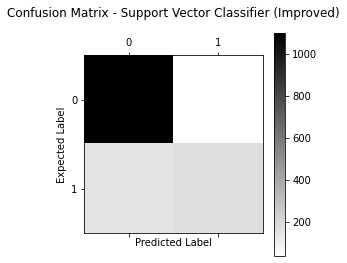

In [38]:
svc_regressor2 = SVC( C = 1.4, gamma = 0.9, kernel = 'rbf')

svc_regressor2.fit(X_train, y_train)

y_pred_svc = svc_regressor2.predict(X_test)

cm_svc2 = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix: \n", cm_svc2)

fig = plt.figure(figsize = (10,6))
plt.matshow(cm_svc2, cmap = plt.cm.binary, interpolation = "nearest")
plt.title("Confusion Matrix - Support Vector Classifier (Improved)\n")
plt.colorbar()
plt.ylabel("Expected Label")
plt.xlabel("Predicted Label")
plt.show()



In [39]:
print("Total Predictions : ",len(y_pred_svc))
print("Correct Prediction : ", sum(y_pred_svc == y_test))
print("Incorrect Prediction : ", sum(y_pred_svc != y_test))
print("Accuracy : ", sum(y_pred_svc == y_test)*100 / len(y_pred_svc), "%")


Total Predictions :  1470
Correct Prediction :  1279
Incorrect Prediction :  191
Accuracy :  87.00680272108843 %


#### (2) RANDOM FOREST CLASSIFIER

In [40]:
rf_eval = cross_val_score(estimator = rf_regressor, X = X_train, y = y_train, cv = 10)
rf_eval.mean()

0.8637674117265954